In [3]:
import pandas as pd

# CSV 파일 로드
file_path = "제주특별자치도_제주지역_중국인_관광_업종_결제데이터_20170216.csv"
data0 = pd.read_csv(file_path, encoding='cp949')

# 데이터 확인
data0.head()

,지역구분,지역구분_시,지역구분_도심/도심외,지역구분_읍/면/동,관광업종 구분,회원 유형,2014-09~2015-08 카드이용금액,2014-09 ~ 2015-08 카드이용건수,2014-09~2015-08 카드이용자수,2015-09~2016-08 카드이용금액,2015-09~2016-08 카드이용건수,2015-09~2016-08 카드이용자수,데이터기준일자
0,제주도,전체,전체,전체,교통,중국인,175212447,1164,897,131525772,2094,1572,2017-02-16
1,제주도,전체,전체,전체,문화/레져,중국인,51496030372,105713,95402,41562125907,122436,105305,2017-02-16
2,제주도,전체,전체,전체,소매,중국인,202573015771,963687,513522,256067917133,1388534,693308,2017-02-16
3,제주도,전체,전체,전체,쇼핑,중국인,325893391292,1320988,486040,421742999645,2709153,842443,2017-02-16
4,제주도,전체,전체,전체,숙박,중국인,43399696873,21708,16699,38178142342,30450,23311,2017-02-16


In [4]:
# 결측치가 있는 행 삭제
data_cleaned = data0.dropna()

# 삭제된 행의 수 확인
deleted_rows = len(data0) - len(data_cleaned)
print("삭제된 행의 수:", deleted_rows)

# 삭제된 행이 어떤 데이터였는지 확인
print("삭제된 행의 데이터:")
print(data0[data0.isnull().any(axis=1)])


삭제된 행의 수: 0
삭제된 행의 데이터:
Empty DataFrame
Columns: [지역구분, 지역구분_시, 지역구분_도심/도심외, 지역구분_읍/면/동, 관광업종 구분, 회원 유형, 2014-09~2015-08 카드이용금액, 2014-09 ~ 2015-08 카드이용건수, 2014-09~2015-08 카드이용자수, 2015-09~2016-08 카드이용금액, 2015-09~2016-08 카드이용건수, 2015-09~2016-08 카드이용자수, 데이터기준일자]
Index: []


In [5]:
data1 = data0[(data0['지역구분_읍/면/동'] != '전체')]
data = data1[['지역구분_읍/면/동','관광업종 구분','2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']]
data.head()

,지역구분_읍/면/동,관광업종 구분,2014-09~2015-08 카드이용금액,2015-09~2016-08 카드이용금액
21,건입동,소매,592256060,8011659585
22,건입동,쇼핑,46582090,145881300
23,건입동,식음료,62883600,62829600
24,구좌읍,문화/레져,5815800,6634000
25,구좌읍,소매,1537900,8177200


In [6]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # 데이터 프레임 생성
# # data = {
# #     '지역구분_읍/면/동': ['전체', '전체', '전체', '전체', '전체'],
# #     '관광업종 구분': ['교통', '문화/레져', '소매', '쇼핑', '숙박'],
# #     '2014-09~2015-08 카드이용금액': [175212447, 51496030372, 202573015771, 325893391292, 43399696873],
# #     '2015-09~2016-08 카드이용금액': [131525772, 41562125907, 256067917133, 421742999645, 38178142342]
# # }

# df = pd.DataFrame(data)

# # 레이블 인코딩
# label_encoder = LabelEncoder()
# df['관광업종_코드'] = label_encoder.fit_transform(df['관광업종 구분'])

# # 결과 출력
# print(df[['관광업종 구분', '관광업종_코드']])


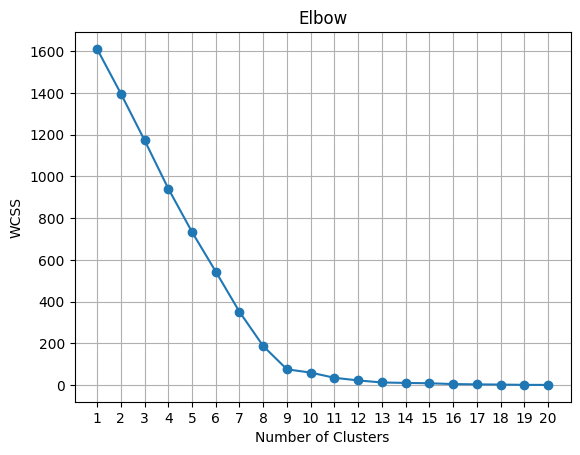

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

#클러스터링 할 변수 지정
selected = data[['관광업종 구분','2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']]

# 문자열 열을 원-핫 인코딩
selected_encoded = pd.get_dummies(selected)

# 데이터 정규화를 통해 수치 조절
scaler = StandardScaler()
selected_scaled = scaler.fit_transform(selected_encoded)

# #데이터 정규화를 통해 수치 조절
# scaler = StandardScaler()
# selected_scaled = scaler.fit_transform(selected)

# 클러스터링 할 변수 지정
selected = data[['관광업종 구분','2014-09~2015-08 카드이용금액', '2015-09~2016-08 카드이용금액']]

# 문자열 열을 원-핫 인코딩
selected_encoded = pd.get_dummies(selected)

# 데이터 정규화를 통해 수치 조절
scaler = StandardScaler()
selected_scaled = scaler.fit_transform(selected_encoded)

# 적절한 k값을 찾기 위해 21개로 초기설정
k_values = range(1, 21)
wcss_values = []

# 1~20의 k 값으로 k-means 모델 학습 후 WCSS값 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_scaled)
    wcss_values.append(kmeans.inertia_)

# 1~10의 k 값에 따른 WCSS값 플롯
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figu

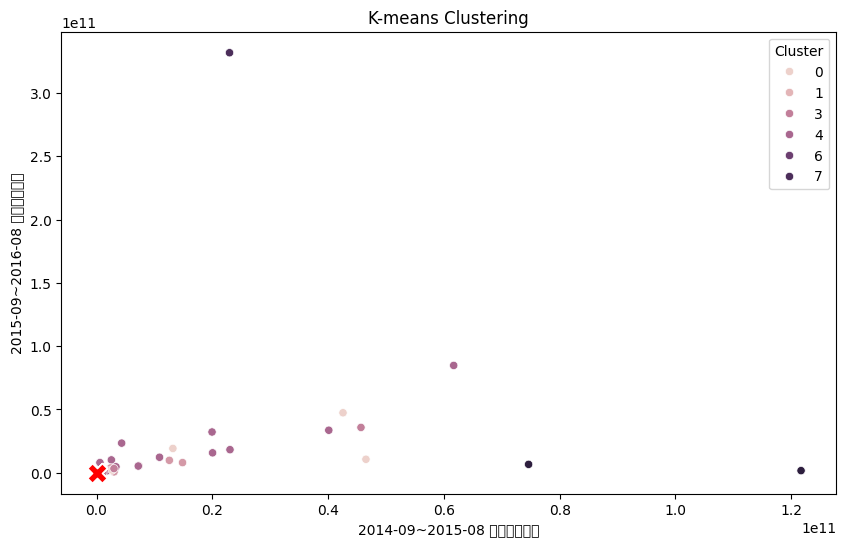

The average of silhouette score: 0.8966136930190614


In [10]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

# k=9로 지정후 새로운 K-means 클러스터링 수행
kmeans = KMeans(n_clusters=9, random_state=0)
clusters = kmeans.fit_predict(selected_scaled)

# 클러스터 중심점을 계산
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=selected_encoded.columns)

# 클러스터 중심점을 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2014-09~2015-08 카드이용금액', y='2015-09~2016-08 카드이용금액', hue=clusters, data=data)
sns.scatterplot(x=cluster_centers['2014-09~2015-08 카드이용금액'], y=cluster_centers['2015-09~2016-08 카드이용금액'], marker='X', s=200, color='red')
plt.title('K-means Clustering')
plt.xlabel('2014-09~2015-08 카드이용금액')
plt.ylabel('2015-09~2016-08 카드이용금액')
plt.legend(title='Cluster')
plt.show()

# 실루엣 점수 계산 및 출력
silhouette_avg = silhouette_score(selected_scaled, clusters)
print("The average of silhouette score:", silhouette_avg)